In [1]:
# coding: utf8

# Calcul des Coformes pour Lexique4
- modifié pour IMM19 sur Lex3
- modifié pour HDR sur Lex4

In [2]:
# -*- coding: utf8 -*-
import pandas as pd
import pickle,glob,pyperclip
import itertools as it
import networkx as nx
import random as rd
import numpy as np
import matplotlib,math
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import ipywidgets as widgets
import pickle as pkl
import EspacesThematiques as ET
from EspacesThematiques import *

S Z N J ê ô â r E H O 6 9 2


In [3]:
repHDR="/Users/gilles/ownCloud/Recherche/Boye/HDR/Memoire/figs/"

In [4]:
import seaborn as sns
sns.set_style("darkgrid")
sns.set_context("paper", font_scale=1.5, rc={"lines.linewidth": 2.5})
sns.set_palette("hls")
sns.set_color_codes("muted")
#sns.palplot(sns.color_palette("hls", 8))
#sns.palplot(sns.color_palette("husl", 8))

In [5]:
%matplotlib inline
#from __future__ import unicode_literals

# Défectifs de Boyé(2000)

In [6]:
boyeDefectifs=[u"abstraire", u"accroire", u"adirer", u"advenir", u"apparoir", u"assavoir", u"avenir",
               u"becter", u"béer", u"bienvenir", u"braire", u"bruire", u"chaloir", u"choir", u"clore", 
               u"comparoir", u"contrefoutre", u"courre", u"déchoir", u"déclore", u"dépourvoir", 
               u"discontinuer", u"dissoudre", u"distraire", u"douer", u"échoir", u"éclore", u"enclore", 
               u"endêver", u"ensuivre", u"ester", u"extraire", u"faillir", u"férir", u"forclore", 
               u"forfaire", u"foutre", u"frire", u"gésir", u"huir", u"impartir", u"issir", u"malfaire", 
               u"méfaire", u"messeoir", u"moufeter", u"moufter", u"mourir", u"oindre", u"ouïr", u"paître", 
               u"parfaire", u"poindre", u"quérir", u"raire", u"rassir", u"ravoir", u"reclure", u"revaloir", 
               u"saillir", u"seoir", u"sourdre", u"soustraire", u"stupéfaire", u"surfaire", u"titre", 
               u"traire", u"urger"]


# Lecture de Lexique4-Verbes
- Lexique4-Verbes vient de LEX4-DistributionCases
- Lexique4-Verbes contient les nombres d'occurrences pour les différentes cases du paradigme de chaque verbe documenté.

In [19]:
repData=""
lexique4=pd.read_csv(repData+'Lexique4-Verbes.tsv',sep="\t",encoding="utf8")

In [49]:
lexique=lexique4[u"graphie lexeme case occurrences".split()]

## Calcul du nombre de cases à remplir par lexème
Ce calcul est lié au Gold, il n'est pas fait pour l'instant pour Lexique4

# Distribution des fréquences et Zipf

## Distribution par lexème, par forme

In [24]:
freqLexemes=lexique.groupby(by="lexeme",as_index=False)["occurrences"].sum().sort_values(by="occurrences",ascending=False)
freqLexemes.reset_index(inplace=True)
freqLexemes.drop(columns="index",inplace=True)
# freqLexemes

⚠️ suivant la version de pandas, il y a un choix pour la concaténation entre un tiret en unicode et un tiret en str :
- freqFormes["lexeme"]+u" - "+freqFormes["case"] 
- freqFormes["lexeme"]+" - "+freqFormes["case"]  

l'un des deux marches avec chaque version. dans le cas contraire, on obtient une erreur de décodage...

In [57]:
freqFormes=lexique.groupby(by=["lexeme","case"],as_index=False).agg({"graphie":set, "occurrences":sum}).sort_values(by="occurrences",ascending=False)
freqFormes.reset_index(inplace=True)
freqFormes.drop(columns="index",inplace=True)
freqFormes["id"]=freqFormes["lexeme"]+" - "+freqFormes["case"]
# freqFormes

## Distribution par case
récupérer le dictionnaire de couleurs des autres scripts pour les graphes avec les noms de cases

In [58]:
freqCases=lexique.groupby(by="case",as_index=False)["occurrences"].sum().sort_values(by="occurrences",ascending=False)
freqCases.reset_index(inplace=True)
freqCases.drop(columns="index",inplace=True)
zipf=freqCases["occurrences"].max()
freqCases["zipf"]=zipf/(freqCases.index+1)

# freqCases

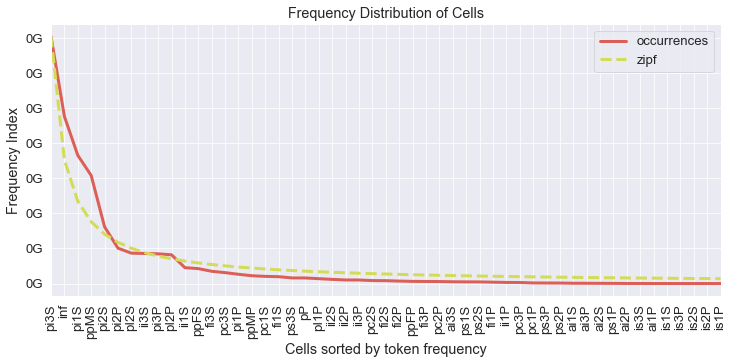

In [59]:
ax=freqCases[["occurrences","zipf"]].plot(kind="line",style=['-', '--'],
                                   figsize=(12, 5),
                                   rot=90,
                                   linewidth=3,
                                   xticks=range(51),
#                                   xlim=[-1,51]
                                  )
ax.set_xticklabels(freqCases["case"])
#plt.grid()
yticks=ax.get_yticks()
yticks=["%dG"%(y/10e9) for y in yticks]
ax.set_yticklabels(yticks)
#ax.set(yscale="log")
#colorerXTicks(ax)
plt.xlabel('Cells sorted by token frequency')
plt.ylabel('Frequency Index')
plt.title('Frequency Distribution of Cells')
plt.show()

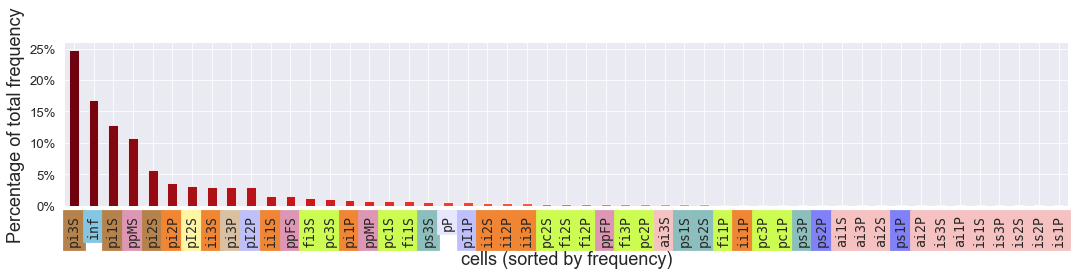

266937.6818181818


In [60]:
freqSomme=freqCases["occurrences"].sum()
freqCases["prop"]=freqCases["occurrences"]/freqSomme*100
ax=freqCases["prop"].plot(kind="bar",figsize=(18, 3),
                          rot=90,xticks=range(51),
                          color=sns.color_palette("Reds_r",n_colors=51)
                         )
ax.set_xticklabels(freqCases["case"])
#plt.grid()
#plt.xlabel('Cells sorted by frequency')
ax.set(ylabel=u"pourcentage de fréquence",xlabel=u"cases triées par fréquence",yscale="linear")
ax.set(ylabel=u"Percentage of total frequency",xlabel=u"cells (sorted by frequency)",yscale="linear")
ax.yaxis.label.set_size(18)
ax.xaxis.label.set_size(18)
yticks=ax.get_yticks()
yticks=["%.3g%%"%y for y in yticks]
ax.set_yticklabels(yticks)
colorerXTicks(ax,fSize=10)
# plt.title(u'Distribution de la fréquence entre les cases du paradigme')
# plt.title(u'Cell Frequencies',fontsize=16)
plt.show()
print freqCases.iloc[0]["prop"]/freqCases.iloc[50]["prop"]
# freqCases[["case","prop"]]

In [61]:
etCols=[c for et in etCells for c in et] #déplacé dans ET

In [62]:
sFreqCases=freqCases.set_index("case").T[etCols].T

In [63]:
sFreqCases=freqCases.sort_values(by="case")
sFreqCases=freqCases.set_index("case").T[etCols].T
sFreqCasesSum=sFreqCases["occurrences"].sum()
sFreqCases["percent"]=sFreqCases["occurrences"]/sFreqCasesSum
sFreqCases.reset_index(inplace=True)

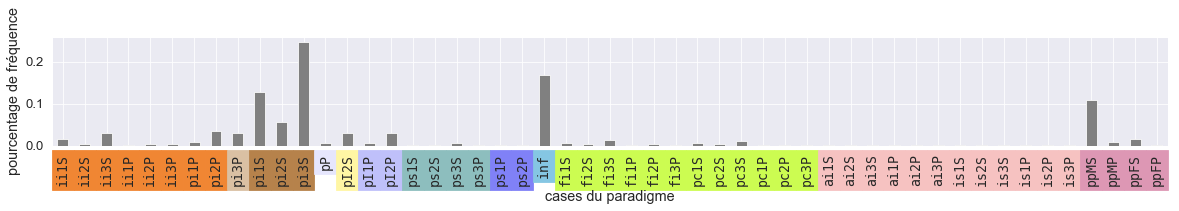

In [64]:
ax=sFreqCases["percent"].plot(kind="bar",
                              figsize=(20, 2),
                              color="grey",
                             )
ax.set_xticklabels(sFreqCases["case"])
colorerXTicks(ax)
#ax.set_ylim([0,0.25])
ax.set(ylabel=u"pourcentage de fréquence",xlabel=u"cases du paradigme",yscale="linear")
#plt.grid()
plt.show()

### Evolution de la fréquence du passé simple 3 en fonction du rang

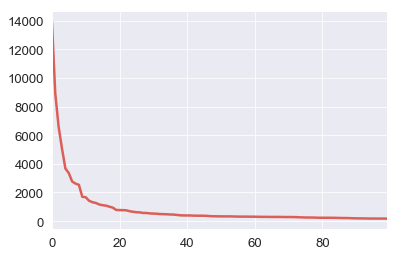

In [65]:
ai3S=lexique[lexique["case"]=="ai3S"].sort_values(by="occurrences",ascending=False).reset_index()
ax=ai3S["occurrences"][:100].plot()
plt.show()

# Évaluation de la distribution de fréquence comme indice de défectivité
- avec la fréquence brute FS
- avec la fréquence relative FSN
- avec le log de la fréquence brute FL
- avec le log de la fréquence brute moyenné FLN

### Ajout d'une colonne freqLog

In [66]:
lexique.loc[:,"freqLog"]=np.log(lexique.loc[:,"occurrences"])

/Users/gilles/anaconda/envs/py27/lib/python2.7/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)


## Distribution des cases par lexème

In [67]:
def lexique2Paradigmes(lexique,values="occurrences",lAggfunc=lambda x: sum(x)):
    return pd.pivot_table(lexique, values=values, index=['lexeme'], columns=['case'], aggfunc=lAggfunc).reset_index().reindex()

In [68]:
colFreq="occurrences"
paradigmeFS=lexique2Paradigmes(lexique,"occurrences")
paradigmeFL=lexique2Paradigmes(lexique,"freqLog")

## Ajout d'une colonne fréquence de lexème

In [69]:
paradigmeFS["freqLexeme"]=paradigmeFS[etCols].sum(axis=1,numeric_only=True)
paradigmeFL["freqLexeme"]=paradigmeFL[etCols].sum(axis=1,numeric_only=True)

## Normalisation des fréquences de formes par rapport à la fréquence de lexèmes
on obtient des proportions entre les formes

In [70]:
paradigmeFSN=paradigmeFS.copy()
paradigmeFLN=paradigmeFL.copy()
for case in etCols:
    paradigmeFSN[case]=(paradigmeFSN[case]/paradigmeFSN["freqLexeme"])
    paradigmeFLN[case]=(paradigmeFLN[case]/paradigmeFLN["freqLexeme"])

### Index des verbes défectifs et standard

In [71]:
ixDefectif=paradigmeFS[paradigmeFS.lexeme.isin(boyeDefectifs)].lexeme.to_dict()
defectifIx={v:k for k,v in ixDefectif.iteritems()}
ixDefectif,defectifIx

({29: u'abstraire',
  59: u'accroire',
  109: u'advenir',
  460: u'avenir',
  552: u'becter',
  686: u'braire',
  736: u'bruire',
  764: u'b\xe9er',
  923: u'chaloir',
  992: u'choir',
  1075: u'clore',
  1141: u'comparoir',
  1273: u'contrefoutre',
  1349: u'courre',
  1535: u'discontinuer',
  1564: u'dissoudre',
  1574: u'distraire',
  1609: u'douer',
  1734: u'd\xe9choir',
  1748: u'd\xe9clore',
  2085: u'd\xe9pourvoir',
  2443: u'enclore',
  2473: u'end\xeaver',
  2566: u'ensuivre',
  2670: u'ester',
  2737: u'extraire',
  2758: u'faillir',
  2882: u'forfaire',
  2912: u'foutre',
  2941: u'frire',
  2982: u'f\xe9rir',
  3165: u'g\xe9sir',
  3281: u'impartir',
  3637: u'malfaire',
  3734: u'messeoir',
  3820: u'moufeter',
  3821: u'moufter',
  3825: u'mourir',
  3993: u'oindre',
  4037: u'ou\xefr',
  4099: u'parfaire',
  4147: u'pa\xeetre',
  4294: u'poindre',
  4549: u'qu\xe9rir',
  4601: u'raire',
  4649: u'rassir',
  4677: u'ravoir',
  5145: u'revaloir',
  5483: u'saillir',
  556

In [72]:
ixVerbes=paradigmeFS.lexeme.to_dict()
lexemeLabels=ixVerbes.values()

# Plotter les distributions des défectifs par famille
- clore, déclore, éclore, enclore, forclore

In [73]:
def plotFamille(famille,gParadigme,ylim=None,width=1,yscale="linear",lPalette="Greys"):
    dfAX=(gParadigme[gParadigme["lexeme"].isin(famille)].set_index("lexeme").loc[famille][etCols].T)
    ax=dfAX.plot(kind="bar",
                 figsize=(30,5),
                 width=width,
                 color=["r"]+sns.color_palette(lPalette,n_colors=len(dfAX)-1),
                )
    colorerXTicks(ax)
    ax.set(yscale=yscale,ylabel=u"occurrences par million de mots")
    ax.legend(loc="upper left")
    if ylim:
        ax.set_ylim([0,ylim])
    jointFamille="".join([l.capitalize() for l in famille])
    if yscale=="linear":
        strScale=""
    else:
        strScale=yscale.capitalize()+"-"
    plt.savefig(repHDR+u'Lex3-BP-%s%s-Verbes.pdf'%(strScale,jointFamille), dpi=300, bbox_inches="tight")
    plt.show()

### CLORE

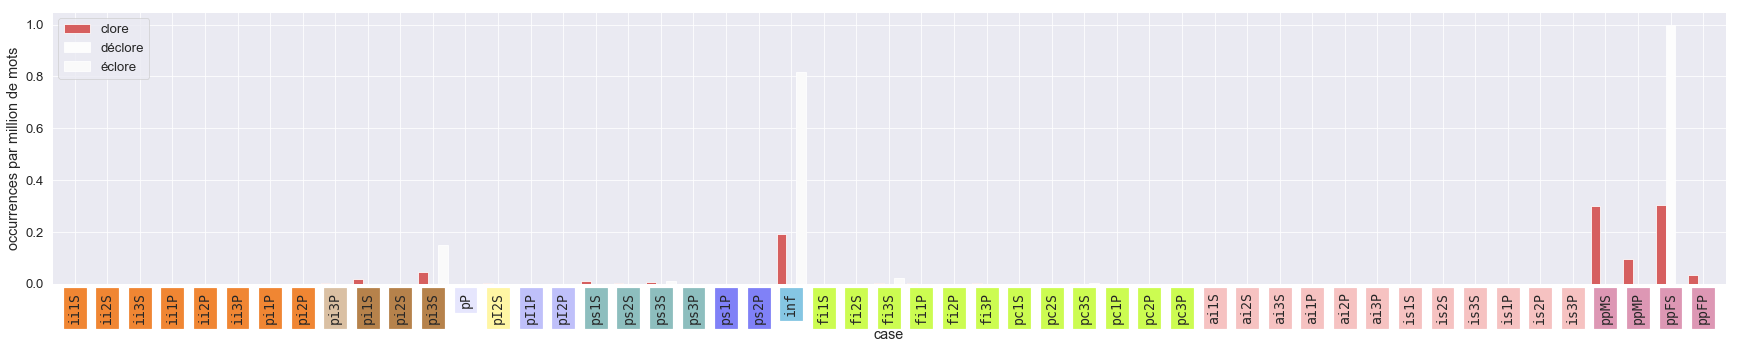

/Users/gilles/anaconda/envs/py27/lib/python2.7/site-packages/ipykernel_launcher.py:2: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  


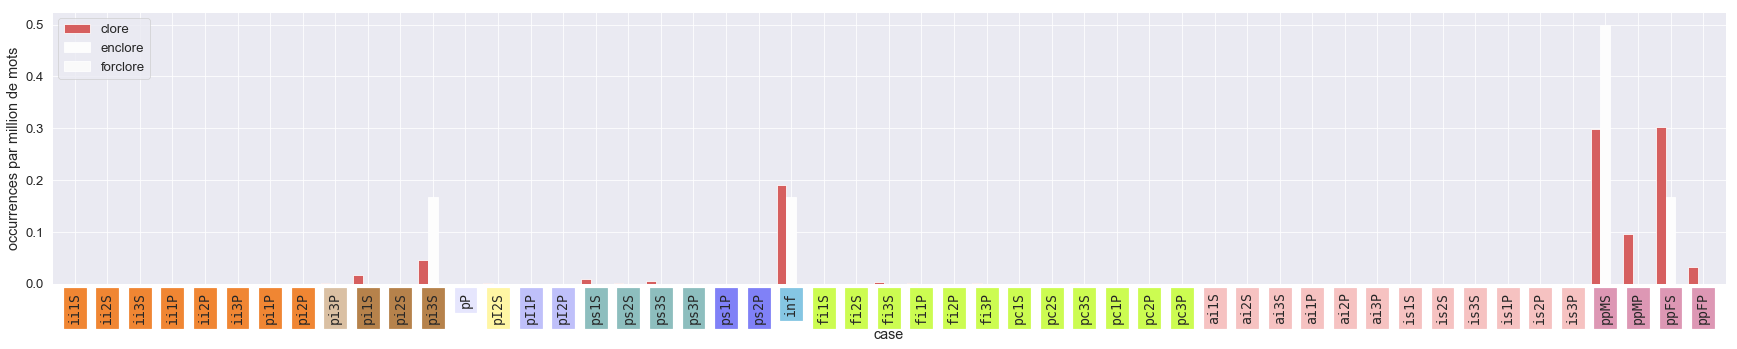

In [74]:
famille=u"clore, déclore, éclore".split(", ")
plotFamille(famille,paradigmeFSN,width=.9,
#            ylim=1.E13,
           )
famille=u"clore, enclore, forclore".split(", ")
plotFamille(famille,paradigmeFSN,width=.9,
#            ylim=1.E13,
           )

/Users/gilles/anaconda/envs/py27/lib/python2.7/site-packages/matplotlib/axes/_base.py:3477: UserWarning: Attempted to set non-positive ylimits for log-scale axis; invalid limits will be ignored.
  'Attempted to set non-positive ylimits for log-scale axis; '


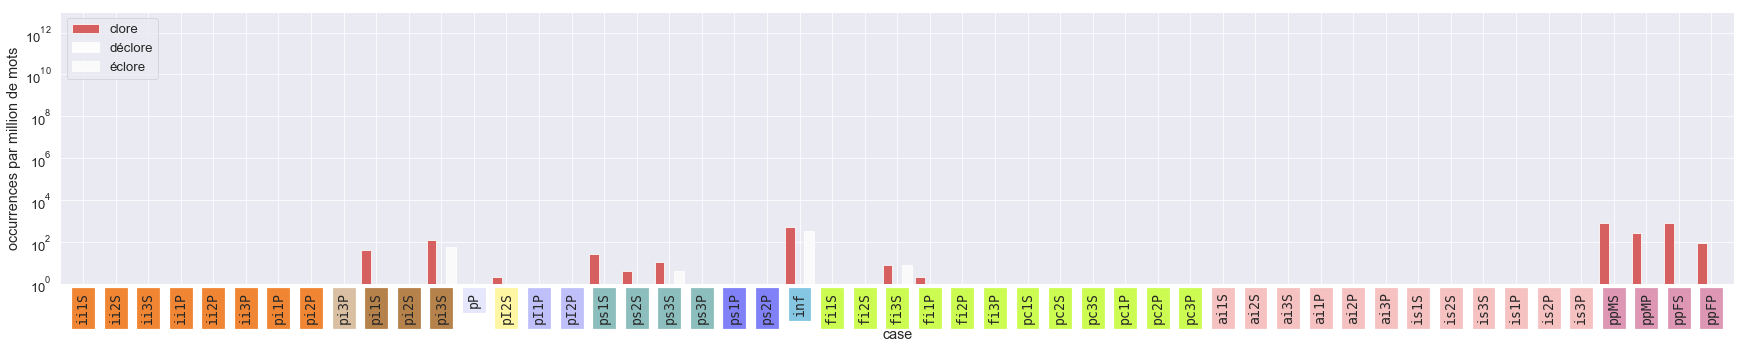

/Users/gilles/anaconda/envs/py27/lib/python2.7/site-packages/ipykernel_launcher.py:2: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  


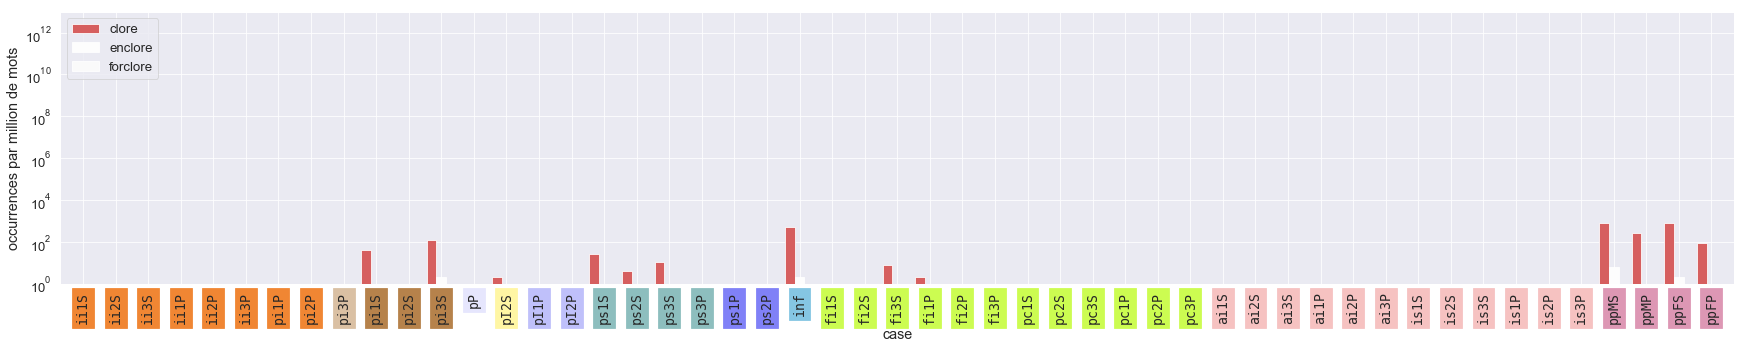

In [75]:
famille=u"clore, déclore, éclore".split(", ")
plotFamille(famille,paradigmeFS,width=.9,
            ylim=1.E13,yscale="log",
           )
famille=u"clore, enclore, forclore".split(", ")
plotFamille(famille,paradigmeFS,width=.9,
            ylim=1.E13,yscale="log",
           )

### Voisins de distribution en données normalisées

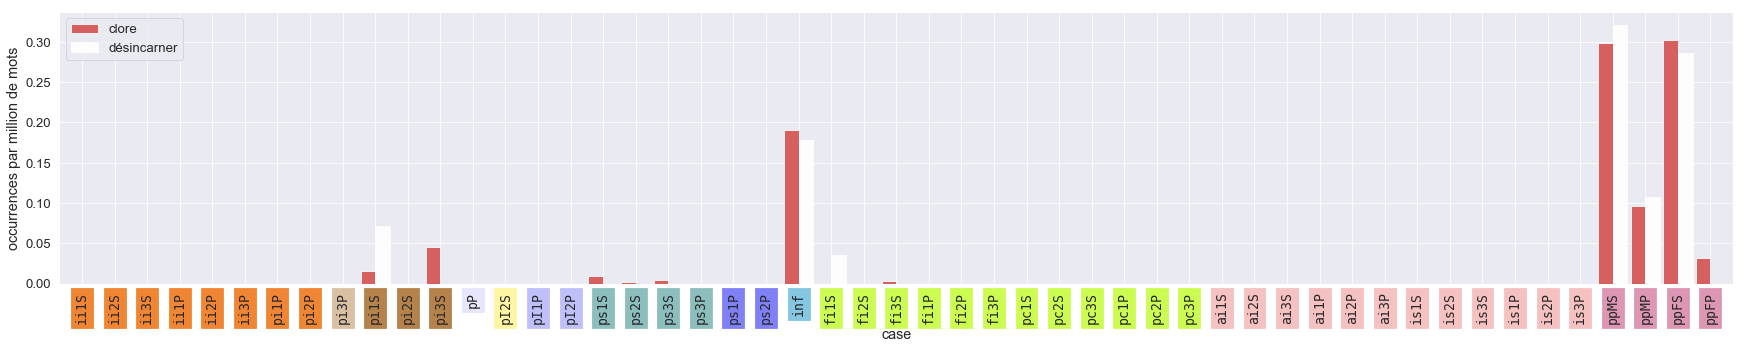

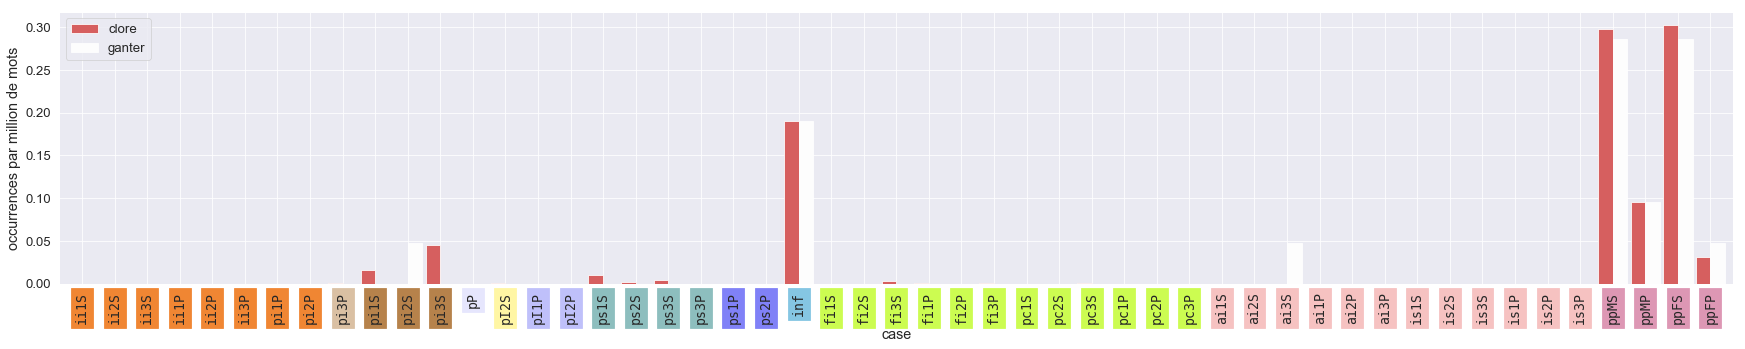

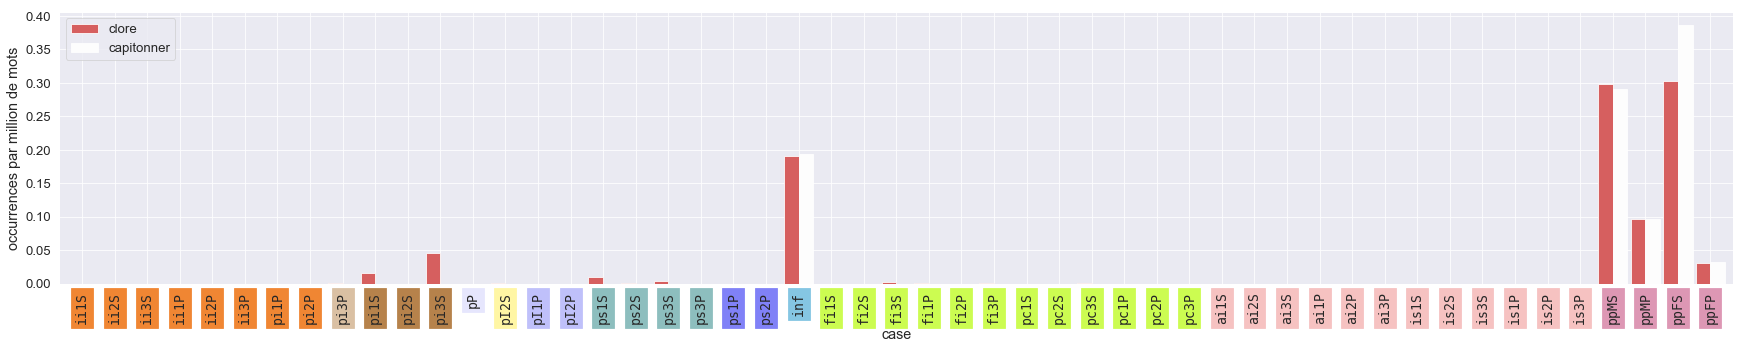

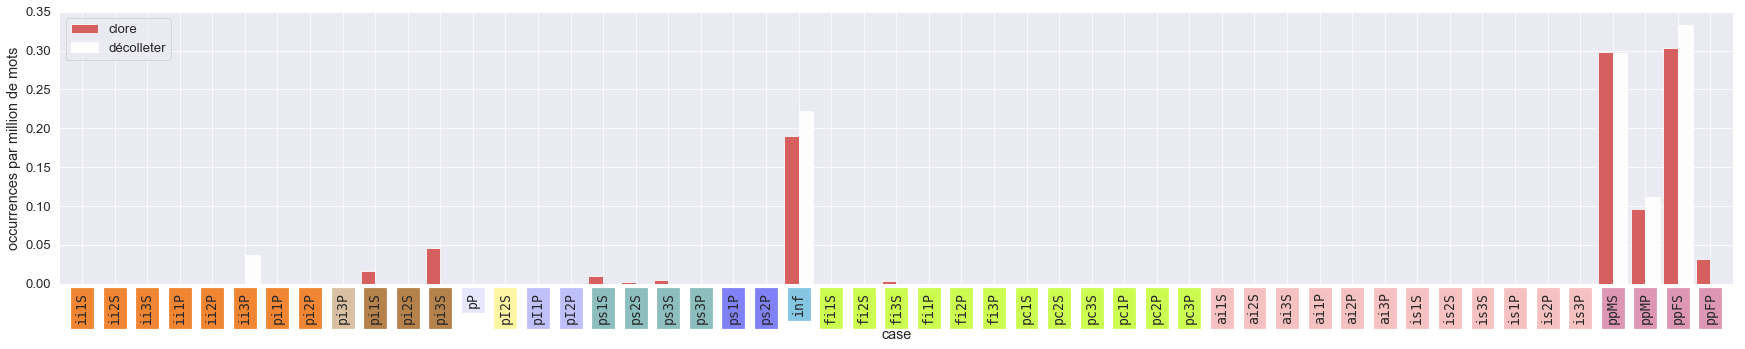

In [76]:
voisinsLex3=u"abrutir promettre revisser reprendre ensevelir calancher".split(" ")
voisins=u"désincarner ganter capitonner décolleter".split(" ")
for voisin in voisins:
    plotFamille([u"clore",voisin],paradigmeFSN,
                width=.9,
               )

### Voisins de distribution en données brutes

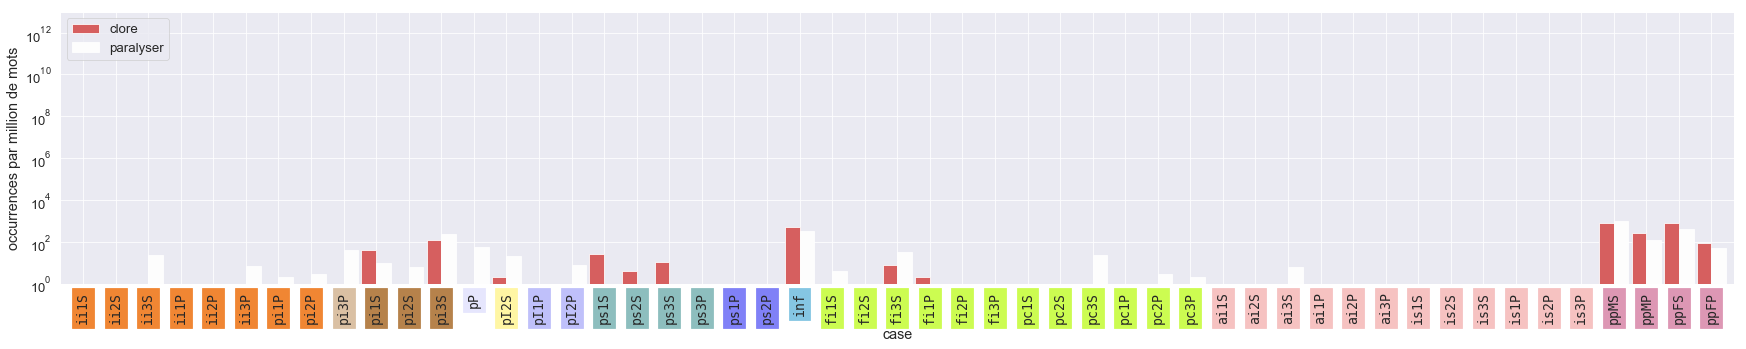

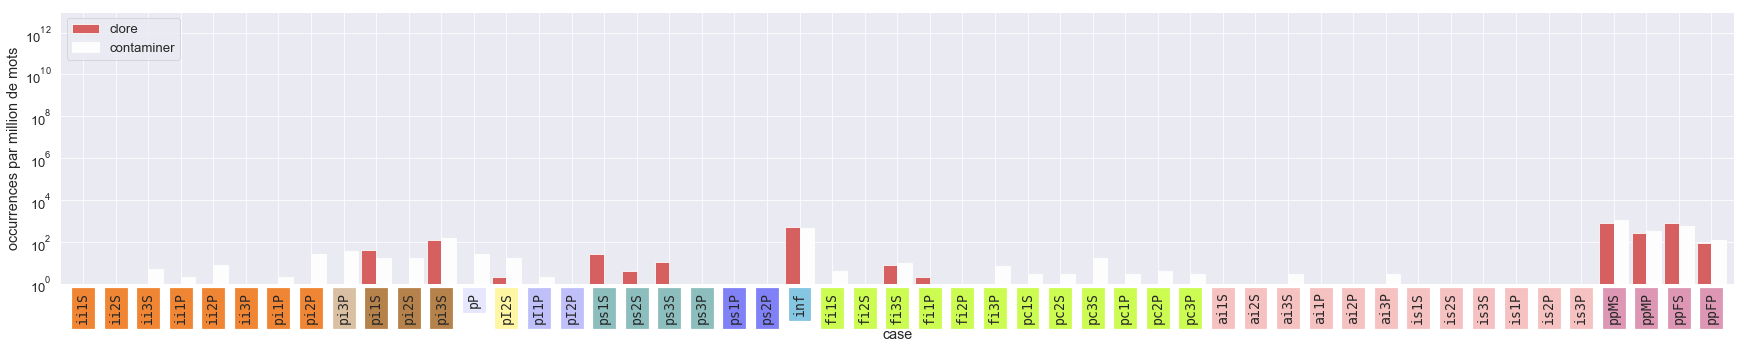

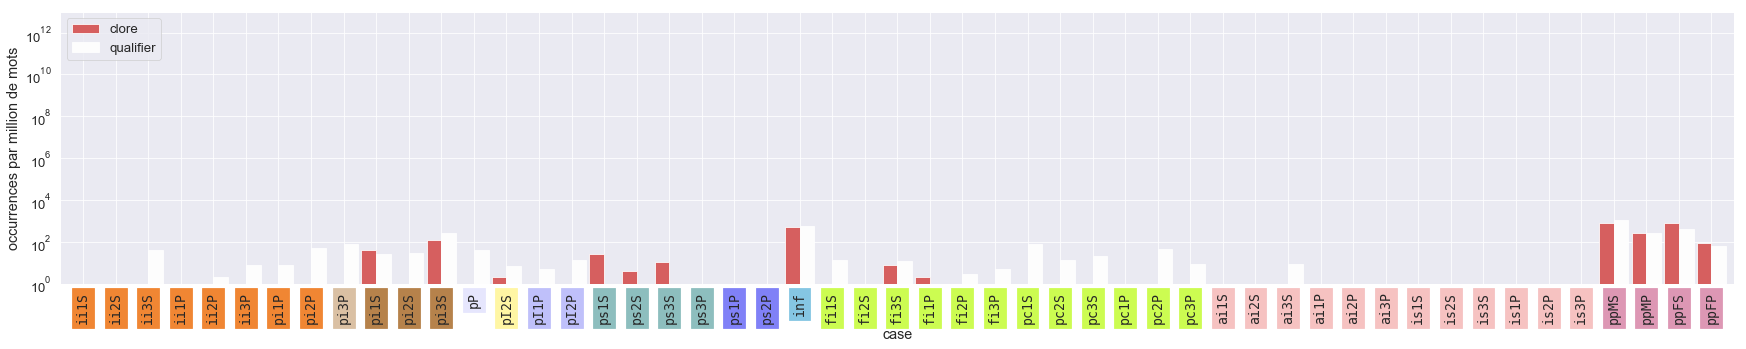

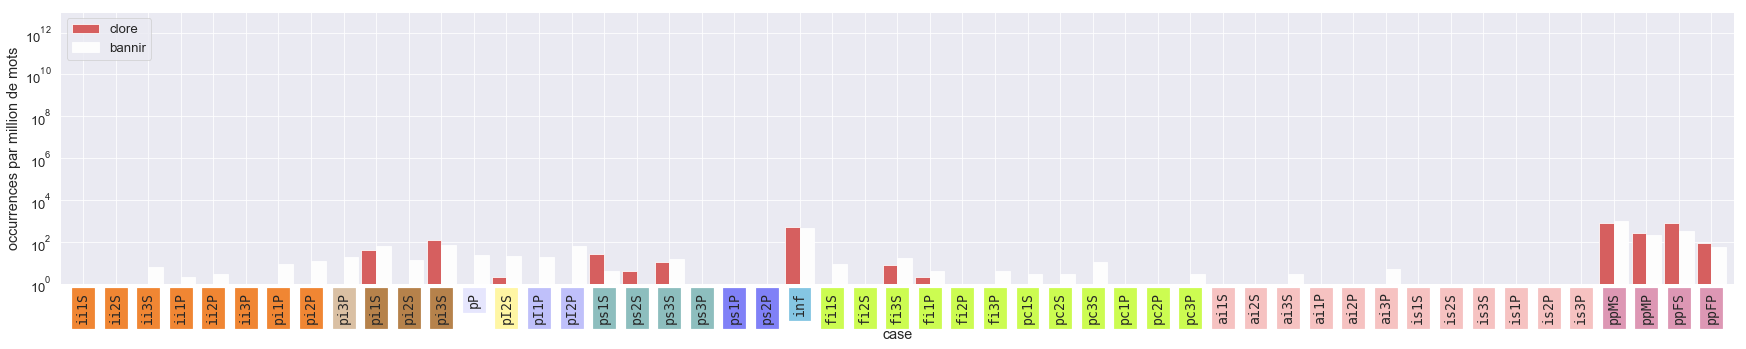

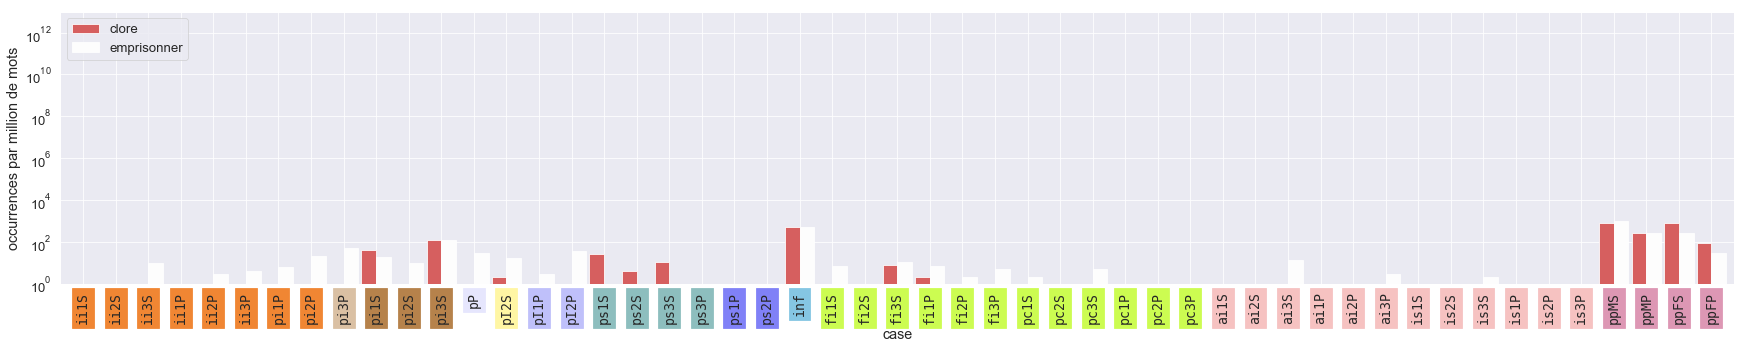

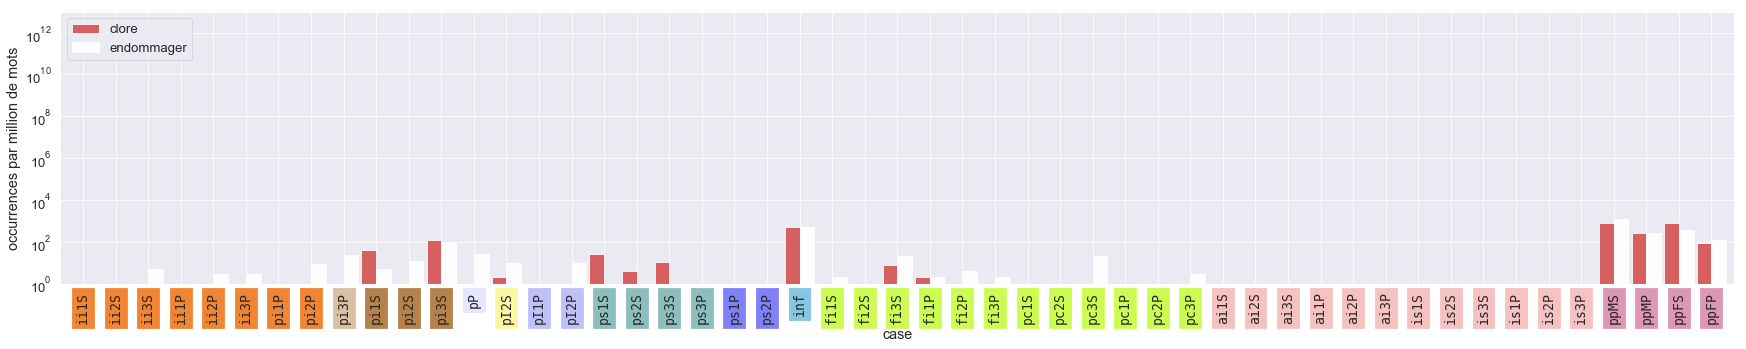

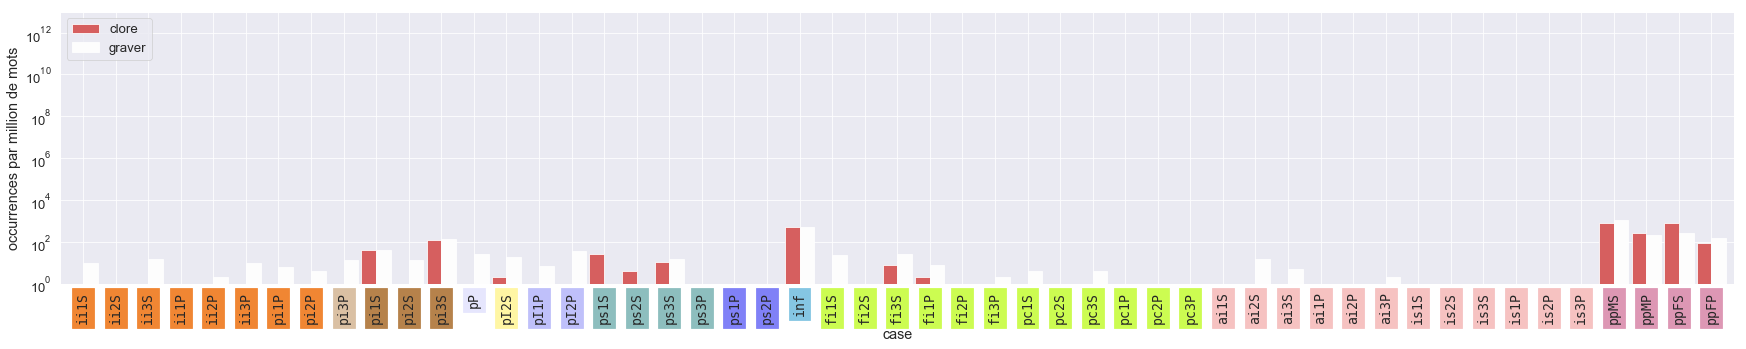

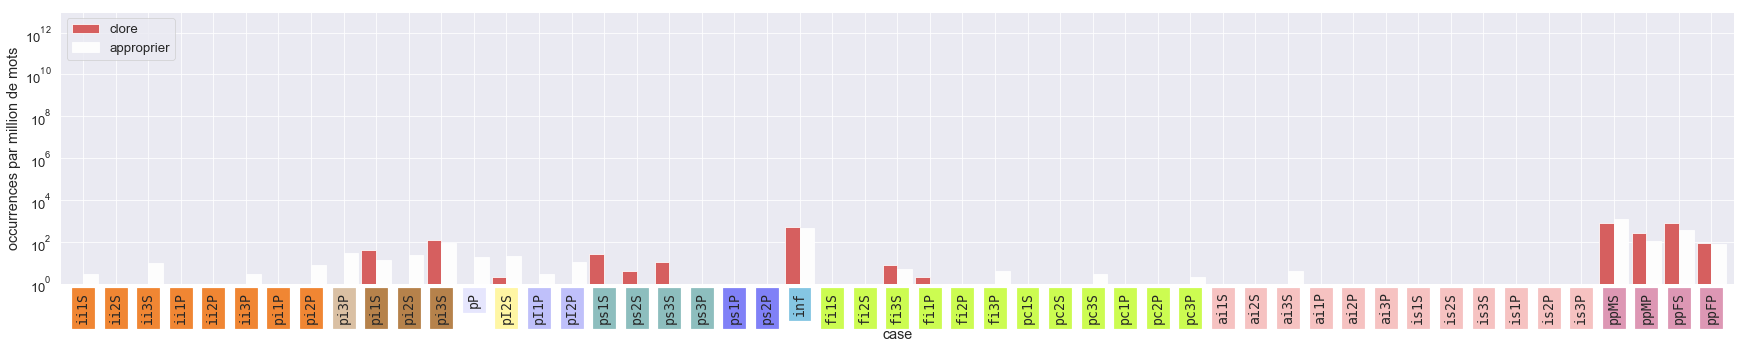

In [77]:
voisins=u"abrutir promettre revisser reprendre ensevelir calancher".split(" ")
voisins=u"paralyser contaminer qualifier bannir emprisonner endommager graver approprier".split(" ")
for voisin in voisins:
    plotFamille([u"clore",voisin],paradigmeFS,
                width=.9,
                ylim=1.E13,yscale="log",
               )

### DISTRAIRE

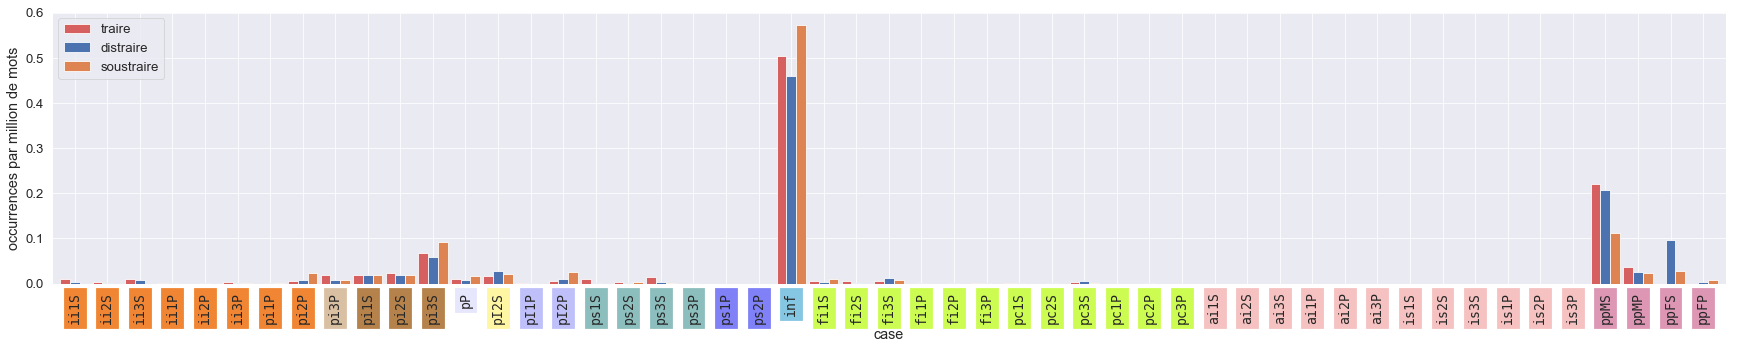

In [78]:
famille=u"traire, distraire, soustraire".split(", ")
plotFamille(famille,paradigmeFSN,width=.9,#yscale="log",
            lPalette="deep"
#            ylim=1.E13,
           )


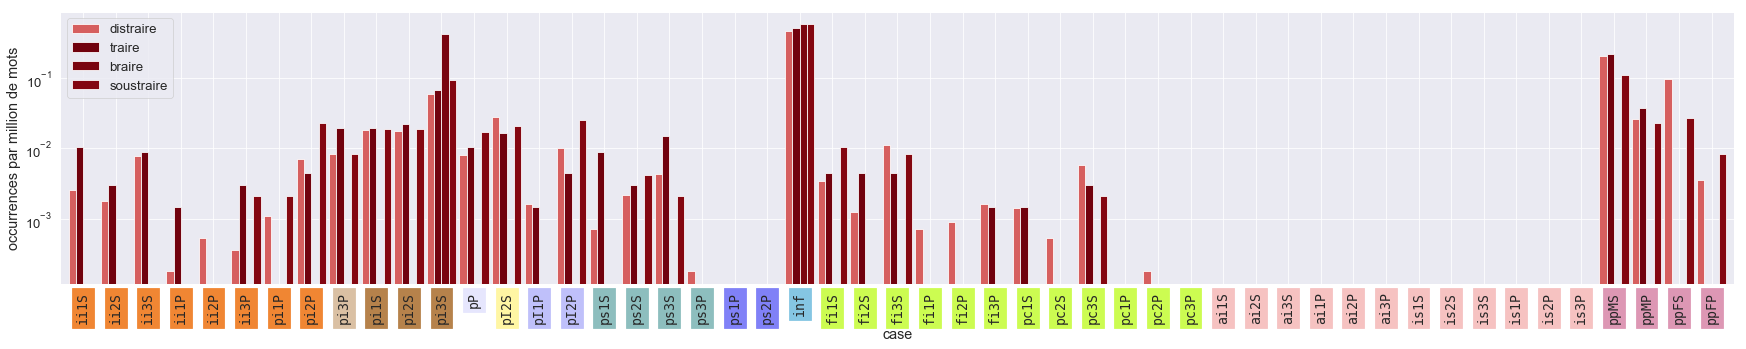

In [79]:
famille=u"distraire, traire, braire, soustraire".split(", ")
plotFamille(famille,paradigmeFSN,width=.9,yscale="log",
            lPalette="Reds_r"
#            ylim=1.E13,
           )


# Clusterisation des distributions de fréquences

## Préparation des données

### Découpage du tableau

In [80]:
def preparerDataRaw(gParadigme):
    paradigme=gParadigme[etCols].copy()
    if "lexeme" in paradigme.columns:
        lexemeLabels=paradigme["lexeme"].tolist()
        del paradigme["lexeme"]
    if "freqLexeme" in paradigme.columns:
        del paradigme["freqLexeme"]

    if "case" in paradigme.columns:
        del paradigme["case"]
    paradigme.fillna(value=0,inplace=True)

    data_raw=paradigme.iloc[:].values
    return data_raw

## Normalisation

In [81]:
from sklearn import preprocessing

def normaliserDataRaw(data_raw):
    return preprocessing.normalize(data_raw)

In [82]:
def dendrogramLabels(id):
    return lexemeLabels[id]

In [83]:
def dendrogramClustersLabels(id):
    if id in clustersLabels:
        return ", ".join(clustersLabels[id][:5])
    else:
        return id

## Clusterisation hiérarchique => dendrogramme

In [84]:
import sys
sys.getrecursionlimit()

1000

In [85]:
sys.setrecursionlimit(100000)

### Clusterisation

In [86]:
from scipy.cluster import hierarchy as hc

In [87]:
def getLinkage(gParadigme,normalize=True):
    data_raw=preparerDataRaw(gParadigme)
    if normalize:
        data=normaliserDataRaw(data_raw)
    else:
        data=data_raw
    Z=hc.linkage(data,method='ward')
    return Z

### Plotter le dendrogramme sans troncation
Le dendrogramme sans troncation permet d'explorer les voisinages des différents verbes avec les distinctions maximales
- la génération de la figure est reportée dans Lexique4-Dendrogram.py pour des questions de gestion de la mémoire

### Récupération des clusters avec troncation
- pour obtenir les clusters, on fait appel à fcluster qui fournit un numéro de cluster pour chaque index de data
    - pour obtenir les noms des verbes, on fait la correspondance entre le numéro obtenu et lexemeLabels
    - pour obtenir les "noms" des clusters, il faut lancer dendrogram une première fois sans plot => R["ivl"]

In [88]:
lexemeLabels=ixVerbes
Z=getLinkage(paradigmeFS)

13094

## Exploitation de la hiérarchie
On peut utiliser networkx pour représenter la hiérarchie dichotomique Z obtenue avec hc.linkage :
- hc.to_tree(Z) donne un arbre qui contient la hiérarchie sous la forme d'un ClusterNode, une structure qui contient pour chaque nœud :
    - id, le label/nom du nœud
    - left, le ClusterNode du descendant à gauche
    - right, le ClusterNode du descendant à droite
- écriture d'un graphe orienté correspondant à la hiérarchie
    - addLevel(root)
        - procédure récursive qui copie la structure de l'arbre dans un graphe orienté *clusterHierarchy*
- extraction de l'ancêtre commun à une paire de verbes :
    - nx.algorithms.lowest_common_ancestor(G,Verbe1,Verbe2)
- extraction de la liste des verbes descendant d'un ancêtre commun
    - nx.descendants(G,ancestor), liste de tous les descendants (y compris les nœuds intermédiaires)
    - G.out_degree(n)==0, sélectionne les nœuds qui n'ont pas de descendants (les feuilles)

In [141]:
clusterHierarchy=nx.DiGraph()

In [142]:
def addLevel(currentNode):
    if currentNode.left:
        addLevel(currentNode.left)
        clusterHierarchy.add_edge(currentNode.id,currentNode.left.id)
    if currentNode.right:
        addLevel(currentNode.right)
        clusterHierarchy.add_edge(currentNode.id,currentNode.right.id)
    return

In [143]:
root=hc.to_tree(Z)
addLevel(root)

#### Renommer les feuilles avec le nom des verbes

In [151]:
clusterHierarchy=nx.relabel_nodes(clusterHierarchy,lexemeLabels)
# clusterHierarchy.edges()

#### Extraction du premier ancêtre commun
On peut utiliser networkx pour extraire le premier ancêtre commun.
- écriture d'un graphe orienté correspondant à la hiérarchie
    - add_edge(père,fils)
- extraction de l'ancêtre
    - nx.algorithms.lowest_common_ancestor(G,Verbe1,Verbe2)

In [ ]:
def getCommonAncestor(v1,v2):
    return nx.algorithms.lowest_common_ancestors.lowest_common_ancestor(clusterHierarchy,v1,v2)

In [186]:
def getCommonClusterFamily(v1,v2):
    ancestor=getCommonAncestor(v1,v2)
    descendantNodes=nx.descendants(clusterHierarchy,ancestor)
    return [n for n in descendantNodes if clusterHierarchy.out_degree(n)==0]

descendantVerbes=getCommonClusterFamily(u"valoir",u"falloir")
print len(descendantVerbes)
print ",".join(descendantVerbes)

302
morguer,fourmiller,bruiner,fenêtrer,rancer,désentrelacer,réouvrer,baller,volanter,esclavager,poindre,receler,matriculer,retreindre,rober,matricer,blatérer,escaloper,prototyper,veiner,indicer,gendarmer,chemiser,godailler,vermiculer,seoir,machiner,importer,refonctionner,décombrer,tramer,jaboter,ombrer,cousiner,voiturer,ambiancer,viander,gaminer,regorger,coqueter,renâcler,pauser,objectiver,maniérer,galipoter,grecquer,soupirer,aiguer,stipuler,chlinguer,baronner,posticher,patoiser,fasciser,piler,platiner,falloir,préfixer,brêler,farter,biter,pyramider,plucher,repartager,compéter,stater,grainer,rauquer,guitariser,hormoner,écorcer,tempêter,fourber,sommeiller,frégater,typer,apostropher,schlinguer,rentraire,zinguer,anglaiser,turluter,dénoter,écanguer,baguer,glatir,décrépiter,poncturer,chlorurer,clocher,lapiner,raciner,frousser,retentir,couder,paternaliser,oranger,toronner,rhumer,paloter,avoisiner,glaiser,incomber,radioscoper,politiquer,cailler,couturer,ressembler,nombrer,policer,goguenarder,

In [89]:
nbClusters=6000
from scipy.cluster.hierarchy import fcluster
clusters=fcluster(Z, t=nbClusters, criterion='maxclust')
clusters

array([2809, 2277, 3952, ..., 1681, 4183, 2827], dtype=int32)

#### Génération des labels pour les clusters tronqués

In [90]:
plt.figure(
#    figsize=(1000,20),
    dpi=72)
#%time dendrogram = hc.dendrogram(Z,truncate_mode="lastp",p=50)
R=dendrogram = hc.dendrogram(Z,
                           p=nbClusters,truncate_mode="lastp",
                           no_plot=True
                          )

R["ivl"] #contient les 'noms' (les numéros) des clusters du plot tronqué


['2102',
 '3470',
 '6458',
 '2955',
 '3519',
 '3641',
 '6123',
 '4765',
 '4966',
 '4237',
 '4539',
 '3990',
 '5123',
 '5273',
 '515',
 '1619',
 '3186',
 '2644',
 '3189',
 '(225)',
 '305',
 '2171',
 '868',
 '4333',
 '1048',
 '3479',
 '2063',
 '5250',
 '1312',
 '5197',
 '3561',
 '4797',
 '1795',
 '2733',
 '4763',
 '6070',
 '6397',
 '3797',
 '3053',
 '3674',
 '2978',
 '(2)',
 '3800',
 '(2)',
 '4965',
 '1373',
 '6309',
 '5806',
 '473',
 '1731',
 '4564',
 '5310',
 '5399',
 '1092',
 '1661',
 '4719',
 '6483',
 '4823',
 '2463',
 '6294',
 '2715',
 '551',
 '1565',
 '1954',
 '3673',
 '3781',
 '2058',
 '1792',
 '4769',
 '3141',
 '3440',
 '5267',
 '3289',
 '5374',
 '2148',
 '208',
 '979',
 '1139',
 '4818',
 '5327',
 '4706',
 '3536',
 '4061',
 '4382',
 '3252',
 '6496',
 '3618',
 '(2)',
 '4375',
 '5993',
 '896',
 '1902',
 '5502',
 '1535',
 '6165',
 '5453',
 '1053',
 '2721',
 '4156',
 '4766',
 '1689',
 '4847',
 '5277',
 '3030',
 '338',
 '4997',
 '5675',
 '886',
 '508',
 '5003',
 '4218',
 '5509',
 '533

<Figure size 432x288 with 0 Axes>

In [91]:
clustersLabels={}
# for nC,c in enumerate(R["ivl"]):
#     clustersLabels[nC]=[]
for nL,l in enumerate(clusters):
#    print nL,l
    cL=R["ivl"][l-1]
    nomC=u"%d-%s"%(l,cL)
    if nomC not in clustersLabels:
        clustersLabels[nomC]=[]
    clustersLabels[nomC].append(lexemeLabels[nL])
clustersLabels

{u'5591-6169': [u'd\xe9noyauter'],
 u'3146-3954': [u'archiver'],
 u'1653-1110': [u'd\xe9nombrer'],
 u'1999-4516': [u'brouiller'],
 u'302-4682': [u'syndicaliser'],
 u'2045-3315': [u'recacher'],
 u'1631-4723': [u'enthousiasmer'],
 u'1554-1848': [u'refoutre'],
 u'4383-2731': [u'bouillonner'],
 u'756-3903': [u'blairer'],
 u'977-2537': [u'r\xe9conforter'],
 u'5690-4512': [u'patter'],
 u'4587-5175': [u'saigner'],
 u'329-4902': [u'd\xe9sendetter'],
 u'1245-6520': [u'corroborer'],
 u'2168-1617': [u'd\xe9sexualiser'],
 u'1355-5444': [u'contre-attaquer'],
 u'5623-2586': [u'parer'],
 u'1559-5920': [u'relacer'],
 u'495-5383': [u'd\xe9trousser'],
 u'3413-3541': [u'institutionnaliser'],
 u'479-3531': [u'spammer'],
 u'2829-1691': [u'rajuster'],
 u'1518-6344': [u'pinter'],
 u'4702-1882': [u'galoper'],
 u'2824-2181': [u'actualiser'],
 u'1628-1627': [u'latter'],
 u'2675-3244': [u'court-circuiter'],
 u'4330-331': [u'rebattre'],
 u'491-4354': [u'talquer'],
 u'276-5076': [u'r\xe9attribuer'],
 u'1733-2283':

In [79]:
with open('DendrogramData.pkl', 'wb') as outFile:
    pickle.dump((Z,clustersLabels,lexemeLabels), outFile, protocol=pickle.HIGHEST_PROTOCOL)


##### Essai avec les données brutes sans normalisation

In [90]:
Zraw=getLinkage(paradigmeFS,normalize=False)
rawClusters=fcluster(Zraw, t=nbClusters, criterion='maxclust')
rawClusters

array([4630, 5566, 3248, ..., 4180, 5797, 5269], dtype=int32)

In [91]:
plt.figure(
#    figsize=(1000,20),
    dpi=72)
#%time dendrogram = hc.dendrogram(Z,truncate_mode="lastp",p=50)
rawR=dendrogram = hc.dendrogram(Zraw,
                           p=nbClusters,truncate_mode="lastp",
                           no_plot=True
                          )

rawR["ivl"] #contient les 'noms' des clusters du plot


['3214',
 '4184',
 '2237',
 '3444',
 '1345',
 '6089',
 '1025',
 '3320',
 '4324',
 '363',
 '2314',
 '1757',
 '2201',
 '850',
 '5261',
 '3584',
 '5655',
 '1727',
 '3249',
 '3251',
 '6377',
 '2223',
 '4408',
 '2129',
 '1283',
 '2939',
 '1942',
 '1719',
 '3150',
 '2931',
 '5790',
 '6525',
 '6029',
 '1372',
 '6452',
 '3635',
 '3863',
 '405',
 '272',
 '907',
 '1034',
 '637',
 '1448',
 '3541',
 '3764',
 '2199',
 '3211',
 '6224',
 '817',
 '3601',
 '4024',
 '401',
 '44',
 '3184',
 '5189',
 '277',
 '1103',
 '2880',
 '3013',
 '5825',
 '6331',
 '53',
 '2368',
 '1213',
 '971',
 '4335',
 '3875',
 '1370',
 '5937',
 '1264',
 '1697',
 '162',
 '4056',
 '3261',
 '6374',
 '5513',
 '973',
 '5547',
 '5073',
 '3907',
 '536',
 '3490',
 '2643',
 '2669',
 '3399',
 '6378',
 '3218',
 '4443',
 '1167',
 '3095',
 '4028',
 '5968',
 '2502',
 '661',
 '2405',
 '3324',
 '6272',
 '1873',
 '2996',
 '2059',
 '157',
 '6004',
 '3031',
 '2036',
 '4434',
 '86',
 '5796',
 '5988',
 '713',
 '1583',
 '2049',
 '2765',
 '6311',
 '417

In [92]:
rawClustersLabels={}
# for nC,c in enumerate(R["ivl"]):
#     clustersLabels[nC]=[]
for nL,l in enumerate(rawClusters):
#    print nL,l
    cL=R["ivl"][l-1]
    nomC=u"%d-%s"%(l,cL)
    if nomC not in rawClustersLabels:
        rawClustersLabels[nomC]=[]
    rawClustersLabels[nomC].append(lexemeLabels[nL])
rawClustersLabels

{u'5591-6169': [u'causer'],
 u'3146-3954': [u's\xe9vir'],
 u'1653-1110': [u'couder'],
 u'1999-4516': [u'chienner'],
 u'302-4682': [u'r\xe9cliner'],
 u'2045-3315': [u'craqueler'],
 u'1554-1848': [u'matir'],
 u'4383-2731': [u'valider'],
 u'756-3903': [u'chalouper'],
 u'977-2537': [u'd\xe9pointer'],
 u'398-1710': [u'd\xe9pigmenter'],
 u'4587-5175': [u'corroborer'],
 u'329-4902': [u'caramboler'],
 u'1245-6520': [u'regrimper'],
 u'2340-3361': [u'catcher'],
 u'1355-5444': [u'incanter'],
 u'5623-2586': [u'rentrer'],
 u'1559-5920': [u'bedonner'],
 u'495-5383': [u'c\xe9sariser', u'd\xe9gripper', u'subroger', u'vulcaniser'],
 u'5610-2136': [u'charger'],
 u'479-3531': [u'arquebuser'],
 u'2829-1691': [u'climatiser'],
 u'1518-6344': [u'ordonnancer'],
 u'4702-1882': [u'halluciner'],
 u'2175-1457': [u'cuber'],
 u'1628-1627': [u'piaffer'],
 u'2675-3244': [u'ch\xe2trer'],
 u'4330-331': [u'crasher'],
 u'491-4354': [u'entartrer',
  u'minimaliser',
  u'recanaliser',
  u'reconceptualiser'],
 u'276-5076': [

In [93]:
with open('DendrogramDataRaw.pkl', 'wb') as outFile:
    pickle.dump((Zraw,rawClustersLabels,lexemeLabels), outFile, protocol=pickle.HIGHEST_PROTOCOL)


In [80]:
for v in boyeDefectifs:
    for c in clustersLabels:
        if v in clustersLabels[c]:
            print v,c
            print clustersLabels[c]
            print

abstraire 3637-5715
[u'abstraire']

accroire 16-1619
[u'accroire', u'aicher', u'ambler', u'anatomiser', u'ang\xe9liser', u'appert', u'ardre', u'asiatiser', u'autocritiquer', u'autogouverner', u'avenir', u'avitailler', u'baluchonner', u'barguigner', u'bistourner', u'boucharder', u'boulanger', u'bouturer', u'brocanter', u'brouillonner', u'b\xe9quer', u'b\xfbcheronner', u'chaloir', u'chaluter', u'champagniser', u'chuinter', u'comparoir', u'contre-expertiser', u'contre-v\xe9rifier', u'courre', u'co\xe9diter', u'diguer', u'disputailler', u'doublonner', u'droper', u'd\xe9activer', u'd\xe9bagouler', u'd\xe9buguer', u'd\xe9carboniser', u'd\xe9certifier', u'd\xe9cr\xe9diter', u'd\xe9diaboliser', u'd\xe9fatiguer', u'd\xe9ficeler', u'd\xe9fringuer', u'd\xe9gurgiter', u'd\xe9jaunir', u'd\xe9mailloter', u'd\xe9maquer', u'd\xe9mascler', u'd\xe9murer', u'd\xe9mythifier', u'd\xe9paqueter', u'd\xe9plisser', u'd\xe9poiler', u'd\xe9qualifier', u'd\xe9rater', u'd\xe9rocher', u'd\xe9sajuster', u'd\xe9sembr

messeoir 4075-2804
[u'adsorber', u'affriander', u'agrainer', u'ajointer', u'anglaiser', u'arsouiller', u'autolimiter', u'baqueter', u'blat\xe9rer', u'brasiller', u'brouetter', u'b\xe9quiller', u'calaminer', u'cameloter', u'charlataner', u'chlorurer', u'chroumer', u'concr\xe9ter', u'cosm\xe9tiquer', u'cr\xeater', u'c\xf4cher', u'dollariser', u'dragonner', u'duplexer', u'd\xe9bouder', u'd\xe9cl\xe9ricaliser', u'd\xe9combrer', u'd\xe9cr\xe9piter', u'd\xe9planquer', u'd\xe9priser', u'd\xe9sentrelacer', u'd\xe9tisser', u'd\xe9verdir', u'emm\xe9trer', u'entabler', u'envider', u'fac-similer', u'farcer', u'fasciser', u'floconner', u'frousser', u'fr\xe9gater', u'galipoter', u'glaiser', u'glatir', u'godailler', u'goguenarder', u'graphiter', u'grecquer', u'grisailler', u'grisoller', u'guitariser', u'g\xe9latiner', u'indurer', u'jaboter', u'journaliser', u'levretter', u'lis\xe9rer', u'louver', u'magn\xe9toscoper', u'man\xe9ger', u'margotter', u'messeoir', u'morguer', u'paloter', u'parall\xe9liser'

In [81]:
(clustersLabels[u"3637-5715"])

[u'abstraire']

### Plotter les voisins de défectifs

In [ ]:
def plotVoisins(voisins,gParadigme,ylim=None):
    for lexeme in voisins:
        dfAX=gParadigme[gParadigme["lexeme"]==lexeme].set_index("lexeme")[cases].T
        ax=dfAX.plot(kind="bar",
                     figsize=(20,5),
                     color=sns.color_palette("hls"),
                    )
        xlabels=ax.get_xticklabels()
        for xlabel in xlabels:
            xtext=xlabel.get_text()
            xlabel.set_backgroundcolor(cellColors[xtext])
        if ylim:
            ax.set_ylim([0,ylim])
        plt.show()

### Voisins de défectifs (fréquence standard FS, fréquence log FL)
- clore
    - FS : revisser,(**clore**,(abrutir,promettre))
    - FL : (**clore**,(corrompre,méconnaître)),((recoudre,réécrire),(mander,étriper))
- distraire
    - FS : ((instruire,(séduire,(**distraire**, extraire))),(régénérer,(construire,détruire)))
    - FL : (((garantir, investir),(enrichir, rafraîchir)),(blâmer, **distraire**))
- abstraire
    - FS : ((**abstraire**, pocher),(distancer, proscrire))
    - FL : ((**abstraire**, parfaire),(peinturlurer,(civiliser, daller)))
- soustraire
    - FL : (brutaliser,débrider),(**soustraire**,étayer)
- extraire
    - FL : (dorloter,désamorcer),(**extraire**,restituer)
- retraire, raire
    - FL : grêler,(**raire**,**retraire**)
- traire
    - FL : (**traire**,**frire**),((**clore**,(corrompre,méconnaître)),((recoudre,réécrire),(mander,étriper))
    
    
Il y a aussi quelques vestiges
- portraire, attraire
    - FS : éclore, crémer, époutier, éperdre, écher, vaser, valeter, troussequiner, tartir, taponner, surglacer, superfinir, sphacéler, sorguer, sniffer, réfranger, réciproquer, redonder, ravoir, ragrandir, raboutir, quérir, pyrrhoniser, pouiller, portraire, méfaire, maquereller, malfaire, mainmettre, galantiser, férir, forpaiser, forfaire, failler, ester, embatre, désoeuvrer, dépatrier, démurger, défâcher, déchouer, couturer, courre, comparoir, chauvir, brouir, bretauder, breller, bouliner, bienvenir, bichoter, bayer, aveindre, attraire, assavoir, argoter, apetisser, alester, alambiquer, aiguayer, accroire, adirer, rassir, occire, reclure, dérayer, rechaper, retordre, regrossir, pionner, coqueter, partouser, hercher, tictaquer, ambler, apponter, jodler, luncher, équeuter, émulsifier, zester, tiller, stripper, soumissionner, signaliser, scolariser, réincarcérer, réargenter, ressemer, resalir, rentamer, rempoter, redémolir, recongeler, reclouer, recarreler, pifer, pastiller, parafer, paginer, inférioriser, hotter, escher, enkyster, enjuiver, encliqueter, embraquer, déventer, désinsectiser, désincruster, désaccoupler, dépoudrer, dénazifier, décriminaliser, déconditionner, décomprimer, dissimiler, diligenter, cureter, coupailler, corréler, contremander, cliver, avitailler, chansonner, quarter, manutentionner, maximiser, exemplifier, trompeter, crosser, maquereauter, syndicaliser, scratcher, rober, rechasser, farter, alcaliniser, alphabétiser, télédiffuser, shampooiner, réabonner, revoter, retuber, reposséder, remprunter, criminaliser, recorder, implémenter, décuver, dépolluer, raller, pleuvioter, varapper, tatillonner, mésuser, lapiner, endêver, dansotter, couchailler, bavocher, bostonner, obvier, rôdailler, égrainer, écornifler, versifier, systématiser, régionaliser, remboîter, reloquer, relaisser, refeuilleter, recogner, reblanchir, rabonnir, pasteuriser, paperasser, maroufler, entrebattre, entr'aimer, engraver, enclouer, encaserner, empanner, désensabler, désenchaîner, désembuer, dépiler, dépaver, démuseler, délustrer, débobiner, correctionnaliser, chabler, cancériser, braser, boyauter, anatomiser, bluter, déconsigner, rapointir, prolétariser, embobeliner, décaisser, désengourdir, mortaiser, vulgariser, décrêper, rebander, désencrasser, rassortir, réséquer, boulanger, réassurer
    - FL : éperdre, écher, vaser, valeter, tartir, sniffer, ravoir, quérir, portraire, galantiser, férir, failler, ester, désœuvrer, démurger, déchouer, couturer, courre, comparoir, chauvir, brouir, bayer, attraire, accroire, assavoir
 

### CLORE

In [ ]:
print "voisins de fréquence brute"
plotVoisins(u"abrutir promettre clore revisser reprendre ensevelir calancher".split(" "),paradigmeFS,ylim=1.2E10)

In [ ]:
print "voisins de fréquence log"
plotVoisins(u"corrompre méconnaître clore mander étriper recoudre réécrire".split(" "),paradigmeFS,ylim=1.6E9)

### DISTRAIRE

In [ ]:
print "voisins de fréquence brute"
plotVoisins(u"instruire séduire distraire extraire régénérer construire détruire".split(" "),paradigmeFS,ylim=2.5E9)

In [ ]:
print "voisins de fréquence log"
plotVoisins(u"garantir investir enrichir rafraîchir blâmer distraire".split(" "),paradigmeFS,ylim=2.5E9)

### ABSTRAIRE

In [ ]:
print "voisins de fréquence brute"
plotVoisins(u"abstraire pocher distancer proscrire".split(" "),paradigmeFS,ylim=10E7)

In [ ]:
print "voisins de fréquence log"
plotVoisins(u"garantir investir enrichir rafraîchir blâmer distraire".split(" "),paradigmeFS,ylim=2.5E9)

### Lister les défectifs de Boyé(2000) dans les différents clusters

In [ ]:
for cl in clustersLabels:
    print "cluster",cl,len(clustersLabels[cl])
    print u"défectifs",", ".join([l for l in clustersLabels[cl] if l in boyeDefectifs])
    print "verbes",", ".join(clustersLabels[cl])
    print
#    print ", ".join(clusters[cl])

## Clusterisation par KMeans

### Choix du nombre de clusters
Calcul du WCSS (within cluster sum of squares)
kmeans.inertia_ est la valeur du wcss du modèle.

In [ ]:
from sklearn.cluster import KMeans
wcss={}
for i in range(1,55):
    kmeans=KMeans(n_clusters=i,init="k-means++",max_iter=300,n_init=10)
    kmeans.fit(data)
    wcss[i]=kmeans.inertia_

In [ ]:
dfWCSS=pd.DataFrame.from_dict(wcss,orient="index")
dfWCSS.plot(figsize=(10,5))

In [ ]:
dfWCSS.diff().plot(figsize=(20,5),xticks=(np.arange(0, 50, step=1))
)


### Clusterisation autour de K points
k-means++ est une stratégie d'initialisation qui permet d'éviter une trappe d'optimisation locale

In [ ]:
nbClusters=7
kmeans=KMeans(n_clusters=nbClusters,init="k-means++")
y_kmeans=kmeans.fit_predict(data)

In [ ]:
lexemeType={}
for nY,y in enumerate(y_kmeans):
    lexemeType[lexemeLabels[nY]]=y
specialLexemes=boyeDefectifs#[u"être",u"avoir",u"pouvoir",u"savoir",u"faire"]
for lex in specialLexemes:
    if lex in lexemeType:
        print lex,lexemeType[lex]

In [ ]:
allLexemes=True
typeLexemes = {}
for k, v in lexemeType.iteritems():
    if k in specialLexemes or allLexemes:
        typeLexemes[v] = typeLexemes.get(v, [])
        typeLexemes[v].append(k)

### plotter les distributions correspondant aux K centres

In [ ]:
pdKMeans=pd.DataFrame(kmeans.cluster_centers_,columns=cases).transpose()

In [ ]:
for i in range(nbClusters):
    iSum=float(pdKMeans[i].sum())
#    print iSum
    pdKMeans[i]=pdKMeans[i]/iSum
#    print pdKMeans[i]
    ax=pdKMeans[i].plot(kind="bar",figsize=(10, 3))
    ax.set_ylim([0,1])
    specLexI=[]
    for l in specialLexemes:
        if l in typeLexemes[i]:
            specLexI.append(l)
            if len(specLexI)>=10:
                break
    nPadLex=5-len(specLexI)
    if nPadLex>0:
        specLexI=specLexI+typeLexemes[i][:nPadLex]
    plt.title("Type %d => %d: "%(i,len(typeLexemes[i]))+",".join(specLexI)+u"\n")
    plt.show()

In [ ]:
for element in typeLexemes:
    print element,len(typeLexemes[element]),typeLexemes[element][:10]

In [ ]:
dfTemp=paradigme[cases].T.isnull().sum()
indexFormes1=dfTemp[dfTemp>=45].index.tolist()
for ix in indexFormes1:
    lexeme=paradigme.iloc[ix]["lexeme"]
    print lexeme,lexemeType[lexeme]
    ax=(paradigme[paradigme["lexeme"]==lexeme].set_index("lexeme")[cases].T.iloc[1:]).plot(kind="bar",figsize=(20,5))
    ax.set_ylim([0,1])
    plt.show()

### Comparaison des distributions de formes entre des voisins potentiels de CLORE

In [ ]:
(paradigme[paradigme.lexeme.isin(u"clore corrompre méconnaître".split(" "))].set_index("lexeme")[cases].T.iloc[1:]).plot(kind="bar",figsize=(20,5))

In [ ]:
(paradigme[paradigme.lexeme.isin(u"clore abrutir promettre".split(" "))].set_index("lexeme")[cases].T.iloc[1:]).plot(kind="bar",figsize=(20,5))